# Logistic Regression in PyTorch

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
mpl.rcParams['figure.dpi'] = 100
sns.set()

In [2]:
def func(x_i):
    if x_i[0]+x_i[1] <= 7+5*random.random():
        y = 0
    else:
        y = 1
    return y
 
def generate_data(no_points):
    X = np.zeros(shape=(no_points, 2))
    Y = np.zeros(shape=(no_points))
    for ii in range(no_points):
        X[ii][0] = random.random()*9+0.5
        X[ii][1] = random.random()*9+0.5
        Y[ii] = func(X[ii])
    return X, Y
X, Y = generate_data(300)

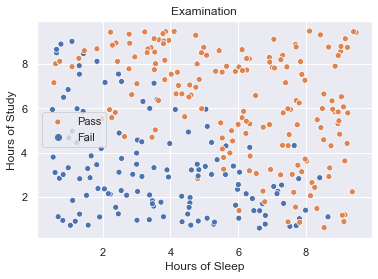

In [3]:
plt.title('Examination')
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours of Study')
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
ax.legend(['Pass', 'Fail'])

In [4]:
# Hyper-parameters 
input_size = 2
num_epochs = 500
learning_rate = 0.15

In [5]:
# Logistic regression model
## Must inherence from torch.nn.Module
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, 1) # 2 in and 1 out
        
    def forward(self, x):
        x = self.linear(x)
        y_pred = torch.sigmoid(x)
        return y_pred

model=Model()
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [6]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X).float()
targets = torch.from_numpy(Y[:,None]).float()

In [7]:
loss_log = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_log.append(loss.item())

    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}' 
               .format(epoch+1, num_epochs, loss.item()))

Epoch [50/500], Loss: 0.5092
Epoch [100/500], Loss: 0.4674
Epoch [150/500], Loss: 0.4373
Epoch [200/500], Loss: 0.4148
Epoch [250/500], Loss: 0.3976
Epoch [300/500], Loss: 0.3839
Epoch [350/500], Loss: 0.3729
Epoch [400/500], Loss: 0.3639
Epoch [450/500], Loss: 0.3564
Epoch [500/500], Loss: 0.3500


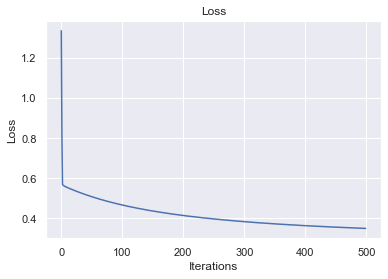

In [8]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
sns.lineplot(range(len(loss_log)), loss_log)

In [9]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    inputs = np.c_[xx.ravel(), yy.ravel()]
    inputs = torch.from_numpy(inputs).float()
    # Predict the function value for the whole gid
    Z = pred_func(inputs)
    Z = Z.detach().numpy().reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.xlabel('x')
    plt.ylabel('y')
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='brg')
    #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.show()

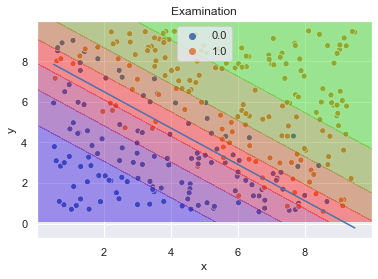

In [10]:
plt.title('Examination')
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours of Study')
x_line = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
ax.legend(['Pass', 'Fail'])
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()


sns.lineplot(x=x_line, y=(-w0[0][0]*x_line-w1[0])/w0[0][1])
plot_decision_boundary(model, X, Y)